**Pressione SHIFT+ENTER para executar a célula**

# Alegrete

Este notebook fornece algumas visualizações para o trabalho de regressão linear. Para conseguir usar, implemente as funções no seu `alegrete.py` e tenha as bibliotecas `numpy` e `matplotlib` instaladas.

O notebook usa um conjunto de dados sintetico. Adapte-o para carregar e usar os dados do `alegrete.csv`.

### Imports das bibliotecas de plot e da solucao implementada

In [1]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import alegrete

### Visualizacao dos dados

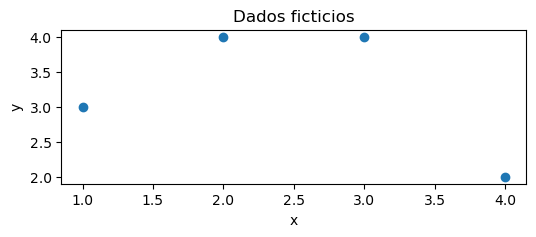

In [2]:
# dataset ficticio -- troque para carregar o alegrete.csv
dataset = np.array([
    [1, 3],
    [2, 4],
    [3, 4],
    [4, 2]
])

#Gráfico dos dados
plt.figure(figsize=(6, 2))
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados ficticios')
plt.show()

### Execucao da regressao linear e calculo do EQM por epoca/iteracao

[2.2  3.75 5.3  6.85]
[0.845 1.295 1.745 2.195]
[1.8685 2.996  4.1235 5.251 ]
[1.2948  1.91055 2.5263  3.14205]
[1.787965 2.690565 3.593165 4.495765]
[1.5630095 2.219027  2.8750445 3.531062 ]
[1.8160801  2.58457535 3.3530706  4.12156585]
[1.74578021 2.38774016 3.0297001  3.67166006]
[1.88918613 2.56629602 3.24340592 3.92051582]
[1.88651297 2.49191991 3.09732684 3.70273378]
[1.97892487 2.58566839 3.1924119  3.79915542]
[2.00491089 2.56544846 3.12598602 3.68652358]
[2.07277444 2.62031899 3.16786354 3.7154081 ]
[2.11002441 2.62363719 3.13724998 3.65086276]
[2.16531071 2.6602985  3.1552863  3.65027409]
[2.20610908 2.67345373 3.14079837 3.60814302]
[2.25428468 2.70123014 3.1481756  3.59512106]
[2.29525631 2.71811397 3.14097162 3.56382928]
[2.33886194 2.74123378 3.14360563 3.54597748]
[2.37857518 2.75914421 3.13971324 3.52028228]
[2.41883281 2.77954522 3.14025763 3.50097004]
[2.45672371 2.7973073  3.1378909  3.47847449]
[2.49425844 2.81589659 3.13753473 3.45917288]
[2.53014794 2.83301872 3.1

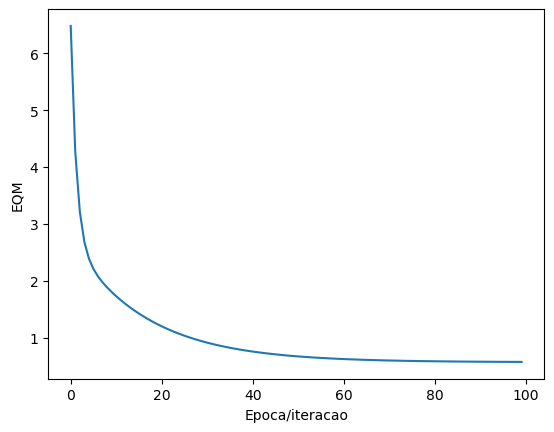

In [3]:
b_history, w_history = alegrete.fit(
    dataset, b=0, w=0, 
    alpha=0.1, num_iterations=100
)

# valores finais de theta0 e theta1
final_b, final_w = b_history[-1], w_history[-1]

mse_list = [alegrete.compute_mse(b, w, dataset) for b, w in zip(b_history, w_history)]
print(f"EQM final: {mse_list[-1]}")


plt.plot(mse_list)
plt.xlabel('Epoca/iteracao')
plt.ylabel('EQM')
plt.show()

### Plot da curva final

Curva encontrada: -0.24015929916514614*x + 3.8240610421703947


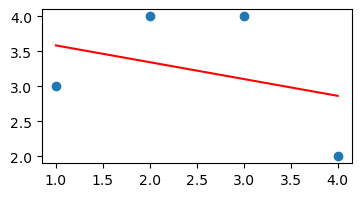

In [4]:
#Imprimir parâmetros otimizados
print (f'Curva encontrada: {final_w}*x + {final_b}')

#plota os dados
plt.figure(figsize=(4, 2))
plt.scatter(dataset[:,0], dataset[:,1])

# plota a curva de ajuste
pred = final_w*dataset[:,0] + final_b
plt.plot(dataset[:,0], pred, c='r')
plt.show()




### Progresso da descida do gradiente com o número de iterações

Execute a celula e use os controles abaixo do grafico para visualizar o progresso do seu ajuste

Pode aparecer um grafico "extra" abaixo da animacao, apenas ignore.

/tmp/ipykernel_37814/1673762163.py:18: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=100.
  ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)


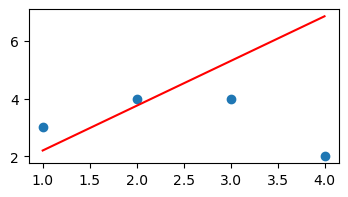

In [5]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)

# conjunto de dados
ax.scatter(dataset[:,0], dataset[:,1])

# linha com os valores iniciais dos parametros
pred = w_history[0]*dataset[:,0] + b_history[0]
line, = ax.plot(dataset[:,0], pred, '-',c='r')

# funcao que atualiza a linha a cada passo
def animate(i):
    pred = w_history[i] * dataset[:,0] + b_history[i]
    line.set_ydata(pred)
    return line,

# mude interval para trocar a velocidade da animacao
ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)
HTML(ani.to_jshtml())